In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv("https://lectures.scientific-python.org/_downloads/087d8fe936fcb7a4762b9850b932cf9e/populations.txt", delimiter="\t")
a = df.values
print(a)

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


####Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

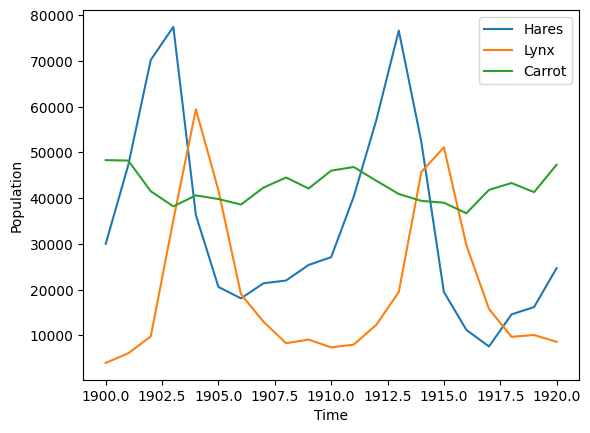

In [7]:
plt.plot(a[:, 0], a[:, 1], label = "Hares")
plt.plot(a[:, 0], a[:, 2], label = "Lynx" )
plt.plot(a[:, 0], a[:, 3], label = "Carrot")

plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()

####Find which year each species had the largest population. Mark these years in the plot of populations.

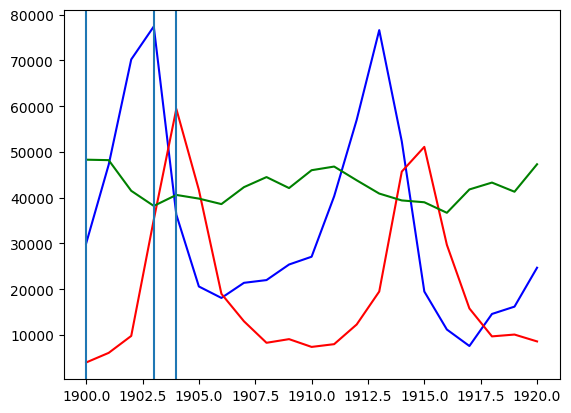

In [8]:
m = np.argmax(a, axis=0)
plt.plot(a[:,0], a[:,1], color='blue')
plt.plot(a[:,0], a[:,2], color='red')
plt.plot(a[:,0], a[:,3], color='green')
plt.axvline(x = a[m[1], 0])
plt.axvline(x = a[m[2], 0])
plt.axvline(x = a[m[3], 0])

####Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

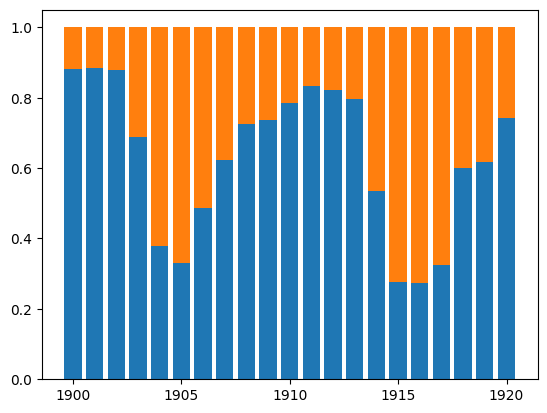

[ 34000.  53300.  80000. 112600.  95700.  62300.  37100.  34400.  30300.
  34500.  34500.  48300.  69300.  96100.  98000.  70600.  40900.  23400.
  24300.  26300.  33300.]


In [9]:
total = a[:, 1:3].sum(axis=1)
plt.bar(a[:, 0], a[:, 1] / total)
plt.bar(a[:, 0], a[:, 2] / total, bottom = a[:, 1]/total)
plt.show()
print(total)

####Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

34080.95238095238 20166.666666666668 42400.0


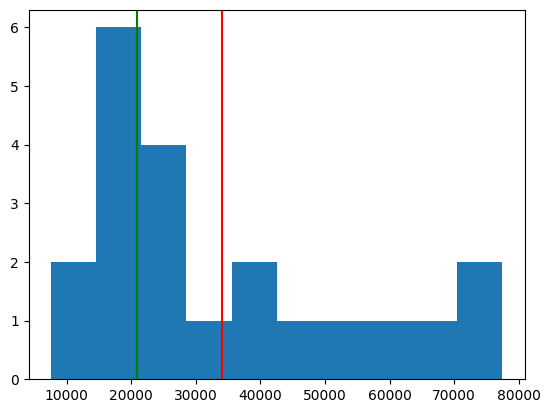

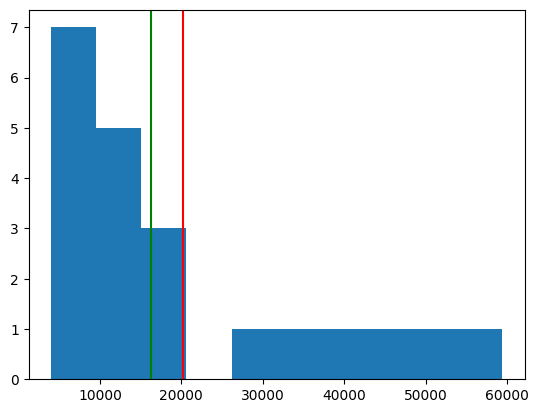

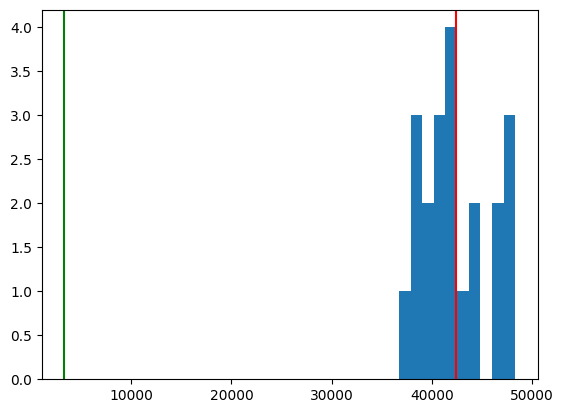

In [10]:
hare_mean = a[:,1].mean(axis = 0)
lynx_mean = a[:,2].mean(axis = 0)
carrot_mean = a[:,3].mean(axis = 0)
print(hare_mean, lynx_mean, carrot_mean)
Var = np.std(a,axis = 0)
plt.hist(a[:,1])
plt.hist(a[:,1].mean(), color = "Yellow")
plt.axvline(x = hare_mean, color = "Red")
plt.axvline(x = Var[1], color = "Green")
plt.show()
plt.hist(a[:,2])
plt.hist(a[:,2].mean(), color = "Yellow")
plt.axvline(x = lynx_mean, color = "Red")
plt.axvline(x = Var[2], color = "Green")
plt.show()
plt.hist(a[:,3])
plt.hist(a[:,3].mean(), color = "yellow")
plt.axvline(x = carrot_mean, color = "Red")
plt.axvline(x = Var[3], color = "Green")
plt.show()

####Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


<function matplotlib.pyplot.show(close=None, block=None)>

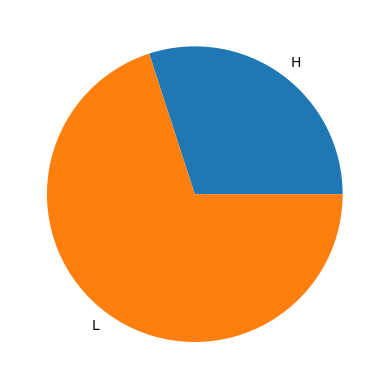

In [11]:
m = np.argmax(a[:, 1:3], axis=1)
species = np.where(m == 0, 'H', 'L')
print(list(species))
n = ['H', 'L']
plt.pie([np.sum(m), 20 - np.sum(m)], labels = n)
plt.show

####Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

-0.9179248480315341


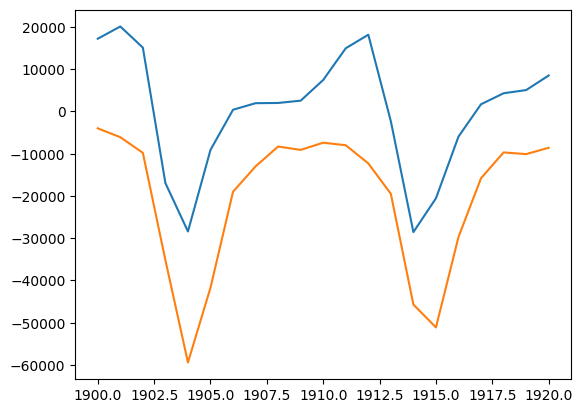

In [12]:
dhare = np.gradient(a[:,1], 1.0)
print(np.corrcoef(dhare, a[:,2])[0,1])
plt.plot(a[:,0], dhare)
plt.plot(a[:,0], -a[:,2])
plt.show()

####Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

Text(0, 0.5, 'Lynx Population')

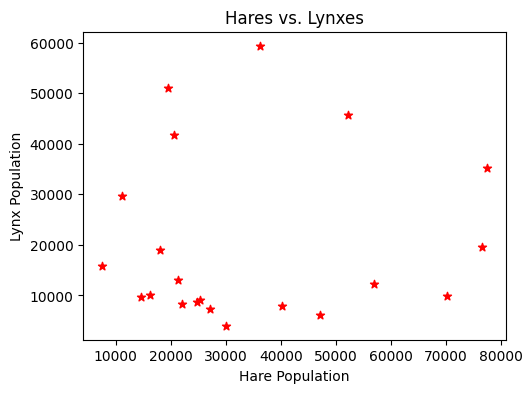

In [13]:
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(1,2,2)
ax.scatter(a[:,1], a[:,2], color = "red", marker = "*")
ax.set_title("Hares vs. Lynxes")
ax.set_xlabel("Hare Population")
ax.set_ylabel("Lynx Population")

####Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

In [14]:
z = np.corrcoef(a[:20,1], a[:20,3])[0,1]
y = np.corrcoef(a[:20,1], a[:20,2])[0,1]
print(y)
print(z)
print(a)

x = a[19,1] - y * a[20,2] + z * a[20,3]
print(x)
print(1 - x / a[20,1])

0.05692969488064267
0.017563728329177967
[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]
16541.16897399659
0.33031704558718256


Задание:

1) напишите функцию, реализующую алгоритм k-means.

Входом в функцию является

* массив NxM, где N -- число объектов, M -- число признаков объекта
* k -- число кластеров
* max_iter -- максимальное число итераций
* threshold -- критерий остановки (если на очередной итерации метода суммарное квадратичное отклонение изменяется меньше, чем на threshold, итерации прекращаются)

Выход:

* массив длины N, содержащий индексы кластеров от 0 до k-1
* суммарное квадратичное отклонение для полученного разбиения на кластеры

Постарайтесь обойтись минимальным количеством циклов в вашем коде.

2) Выделите 10 кластеров в датасете MNIST. Дайте интерпретацию каждому полученному кластеру (к какой цифре его можно отнести). Нарисуйте изображения, которые отвечают центрам кластеров. Посчитайте, сколько из точек кластера действительно являются той цифрой, к которой вы его отнесли (для этого сравните с массивом правильных ответов labels) и нарисуйте матрицу ошибок.

In [15]:
import numpy as np

def k_means(X, k, max_iter=100, threshold=1e-4):
  centers = X[np.random.choice(X.shape[0], k, replace=False)]

  for _ in range(max_iter):
    distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
    labels = np.argmin(distances, axis=1)

    new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    if np.linalg.norm(new_centers - centers) < threshold:
      break

    centers = new_centers

  sse = np.sum([np.linalg.norm(X[labels == i] - centers[i])**2 for i in range(k)])

  return labels, sse


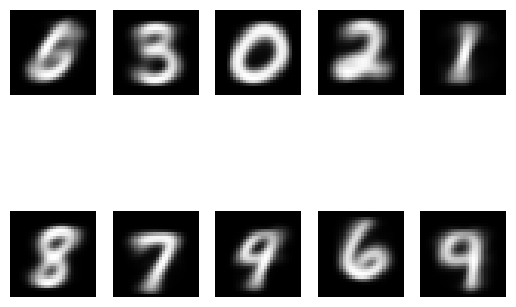

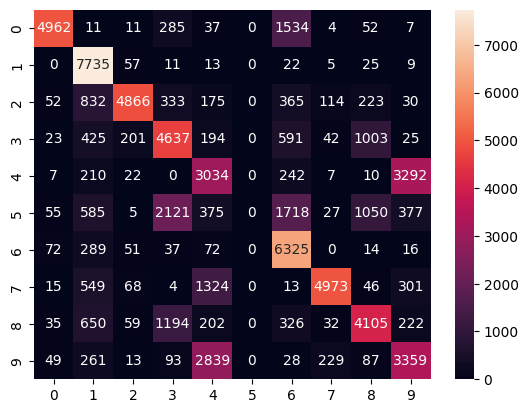

In [16]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

images = images / 255.0
cluster_labels, sse = k_means(images, 10)

def plot_centers(centers, k):
  for i in range(k):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centers[i].reshape(28, 28), cmap='Greys_r')
    plt.axis('off')
  plt.show()

centers = np.array([images[cluster_labels == i].mean(axis=0) for i in range(10)])
plot_centers(centers, 10)

from sklearn.metrics import confusion_matrix
import seaborn as sns

predicted_labels = np.zeros_like(cluster_labels)
for i in range(10):
  mask = (cluster_labels == i)
  predicted_labels[mask] = np.bincount(labels[mask].astype(int)).argmax()

cm = confusion_matrix(labels.astype(int), predicted_labels)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()